# Adidas Sales Database

In [99]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import os 
import csv
import sys

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')

plt.style.use('ggplot')

warnings.filterwarnings('ignore')

In [100]:
df = pd.read_excel("D:\Open Classroom\Datasets\Adidas Sales Dataset\Adidas US Sales Datasets.xlsx", encoding = 'latin1', skiprows=[0,1,2,3])
df.drop(columns=['Unnamed: 0'], inplace = True)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [101]:
df.shape

(9648, 13)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
Retailer            9648 non-null object
Retailer ID         9648 non-null int64
Invoice Date        9648 non-null datetime64[ns]
Region              9648 non-null object
State               9648 non-null object
City                9648 non-null object
Product             9648 non-null object
Price per Unit      9648 non-null float64
Units Sold          9648 non-null int64
Total Sales         9648 non-null float64
Operating Profit    9648 non-null float64
Operating Margin    9648 non-null float64
Sales Method        9648 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [103]:
df.describe().round()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.0,9648.0,9648.0,9648.0,9648.0,9648.0
mean,1173850.0,45.0,257.0,93273.0,34425.0,0.0
std,26360.0,15.0,214.0,141916.0,54193.0,0.0
min,1128299.0,7.0,0.0,0.0,0.0,0.0
25%,1185732.0,35.0,106.0,4254.0,1922.0,0.0
50%,1185732.0,45.0,176.0,9576.0,4371.0,0.0
75%,1185732.0,55.0,350.0,150000.0,52062.0,0.0
max,1197831.0,110.0,1275.0,825000.0,390000.0,1.0


Text(0.5, 1, 'Pearsons Correlation of Column Variable')

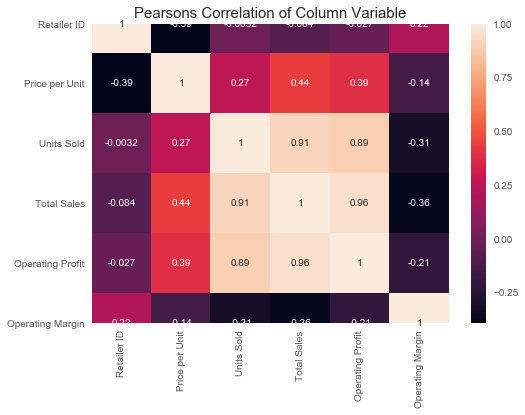

In [104]:
sb.heatmap(df.corr(), annot = True)
plt.title('Pearsons Correlation of Column Variable', fontsize = (15))

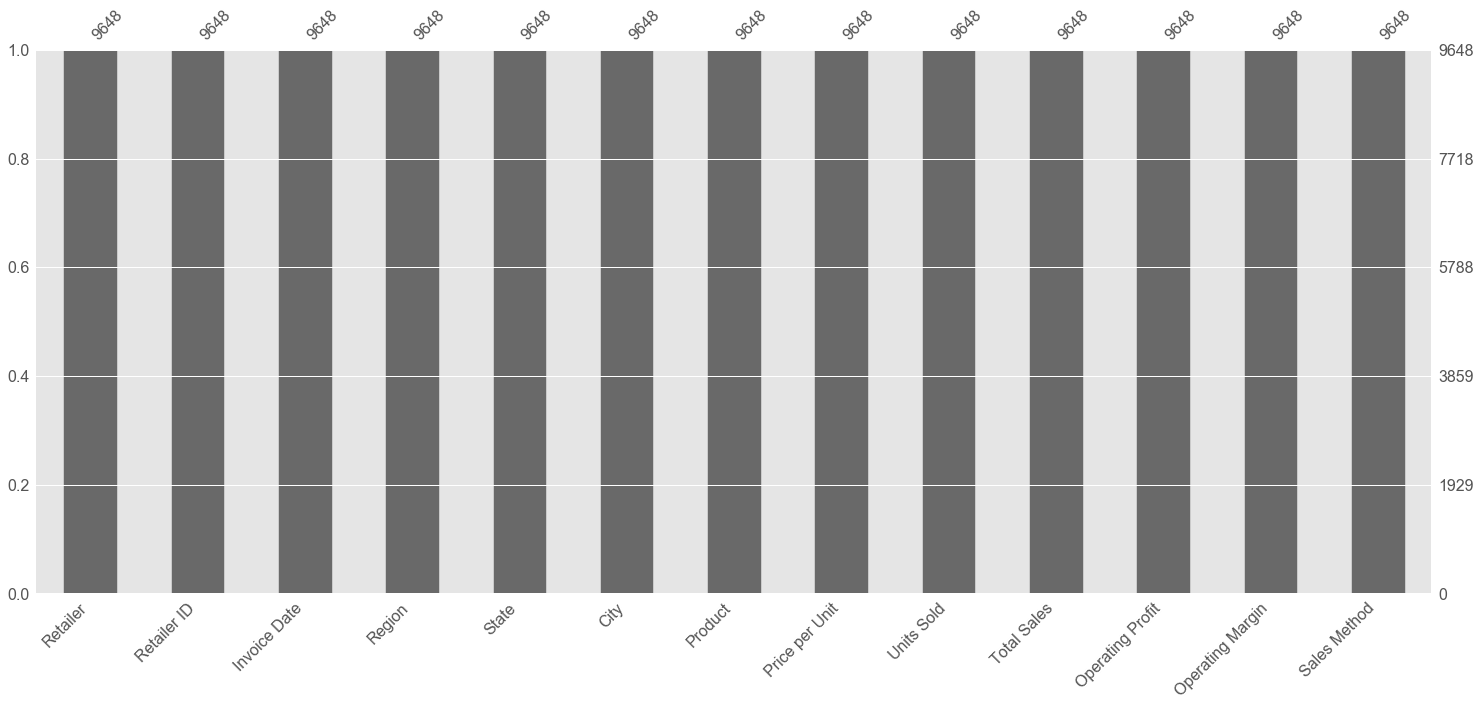

In [105]:
msno.bar(df)

In [106]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


### Exploratory Data Analysis & Manipulation

Text(0.5, 1.0, 'Adidas Retail Stores Ranked')

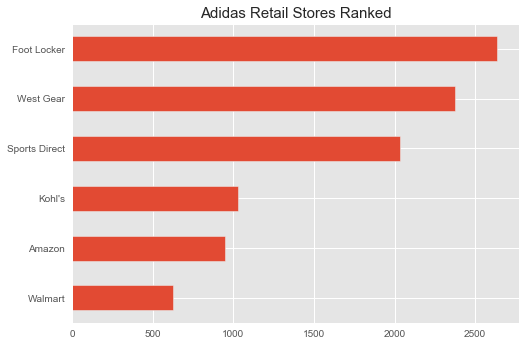

In [107]:
df['Retailer'].value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Adidas Retail Stores Ranked', fontsize=(15))

Text(0.5, 1.0, 'Quantity Sold per Product \nin all Adidas Stores')

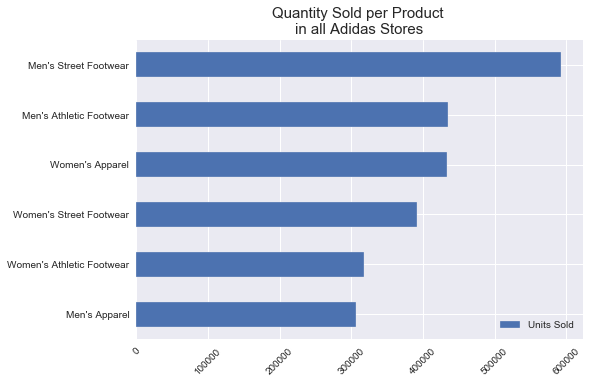

In [108]:
plt.style.use('seaborn')
prod_sld = df.groupby('Product')
prod_sld['Units Sold'].sum().sort_values(ascending = True).to_frame().plot(kind = 'barh')
plt.ylabel(None)
plt.xticks(rotation = 45)
plt.title('Quantity Sold per Product \nin all Adidas Stores', fontsize=(15))

Text(0.5, 1.0, 'Sales Projection per Product \nin all Adidas Stores')

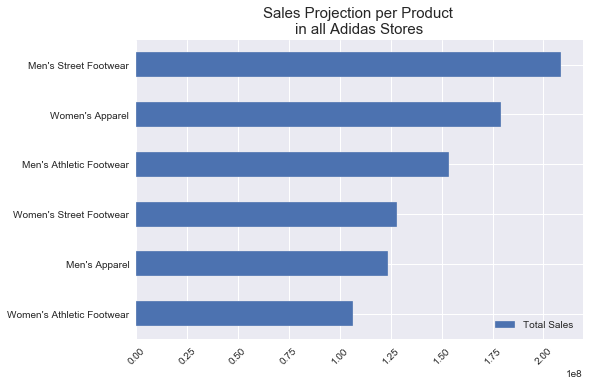

In [109]:
plt.style.use('seaborn')
prod_sld = df.groupby('Product')
prod_sld['Total Sales'].sum().sort_values(ascending = True).to_frame().plot(kind = 'barh')
plt.ylabel(None)
plt.xticks(rotation = 45)
plt.title('Sales Projection per Product \nin all Adidas Stores', fontsize=(15))

In [110]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


Text(0.5, 0, '')

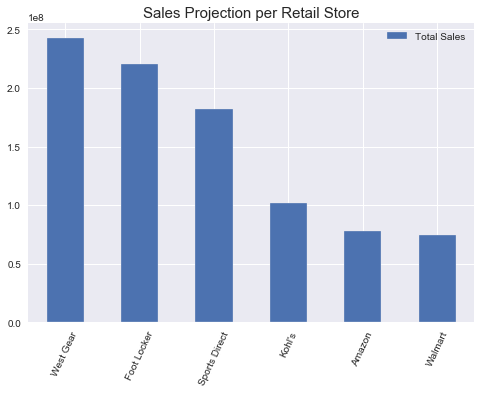

In [111]:
retailer = df.groupby('Retailer')
retailer['Total Sales'].sum().sort_values(ascending = False).to_frame().plot(kind = 'bar')
plt.title('Sales Projection per Retail Store', fontsize = (15))
plt.xticks(rotation = 65)
plt.xlabel(None)

Text(0, 0.5, '')

<Figure size 864x864 with 0 Axes>

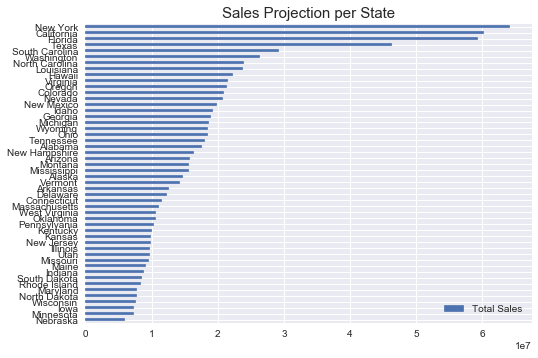

In [121]:
plt.figure(figsize = (12, 12))
retailer = df.groupby('State')
retailer['Total Sales'].sum().sort_values(ascending = True).to_frame().plot(kind = 'barh')
plt.title('Sales Projection per State', fontsize = (15))
# plt.yticks(rotation = 65)
plt.ylabel(None)